# Yunlin Wind Farm: Boundary, Inter-Array Cables, and Turbines

In [2]:
import json
import numpy as np
import matplotlib.pyplot as plt

## Load Wind Farm Boundary

In [5]:
with open("polygonyunlin.geojson") as f:
    boundary_geojson = json.load(f)

boundary_polygons = []
for feature in boundary_geojson["features"]:
    if feature["geometry"]["type"] == "Polygon":
        coords = np.array(feature["geometry"]["coordinates"][0])
        boundary_polygons.append(coords)

boundary_array = boundary_polygons[0]
print("Boundary shape:", boundary_array.shape)
boundary_array

Boundary shape: (10, 2)


array([[120.00185469,  23.62519023],
       [120.03240742,  23.65300963],
       [120.0685152 ,  23.65334885],
       [120.05542922,  23.56130681],
       [120.03261095,  23.53253171],
       [119.99116395,  23.51901638],
       [119.99047027,  23.55780962],
       [119.99984154,  23.61137129],
       [120.0012568 ,  23.62084041],
       [120.00185469,  23.62519023]])

## Load Inter-Array Cable Segments

In [8]:
with open("linecables.geojson") as f:
    cables_geojson = json.load(f)

cable_lines = []
for feature in cables_geojson["features"]:
    if feature["geometry"]["type"] == "LineString":
        coords = feature["geometry"]["coordinates"]
        for i in range(len(coords) - 1):
            x1, y1 = coords[i]
            x2, y2 = coords[i + 1]
            cable_lines.append([x1, y1, x2, y2])

cables_array = np.array(cable_lines)
print("Cables shape:", cables_array.shape)
cables_array[:5]

Cables shape: (318, 4)


array([[120.0327234 ,  23.65264163, 120.04196679,  23.65276822],
       [120.04196679,  23.65276822, 120.05590098,  23.65317911],
       [120.05590098,  23.65317911, 120.06499599,  23.65291037],
       [120.0145186 ,  23.63580163, 120.02304999,  23.6436171 ],
       [120.02304999,  23.6436171 , 120.02493191,  23.64534104]])

## Load Wind Turbine Generator Locations

In [11]:
with open("pointgenerator.geojson") as f:
    turbines_geojson = json.load(f)

turbine_points = []
for feature in turbines_geojson["features"]:
    if feature["geometry"]["type"] == "Point":
        x, y = feature["geometry"]["coordinates"]
        turbine_points.append([x, y])

turbines_array = np.array(turbine_points)
print("Turbines shape:", turbines_array.shape)
turbines_array[:5]

Turbines shape: (80, 2)


array([[120.02301265,  23.64434563],
       [120.01416695,  23.635725  ],
       [120.02781191,  23.63865608],
       [120.03524606,  23.63865608],
       [120.04277431,  23.63925953]])

## Plot All Layers Together

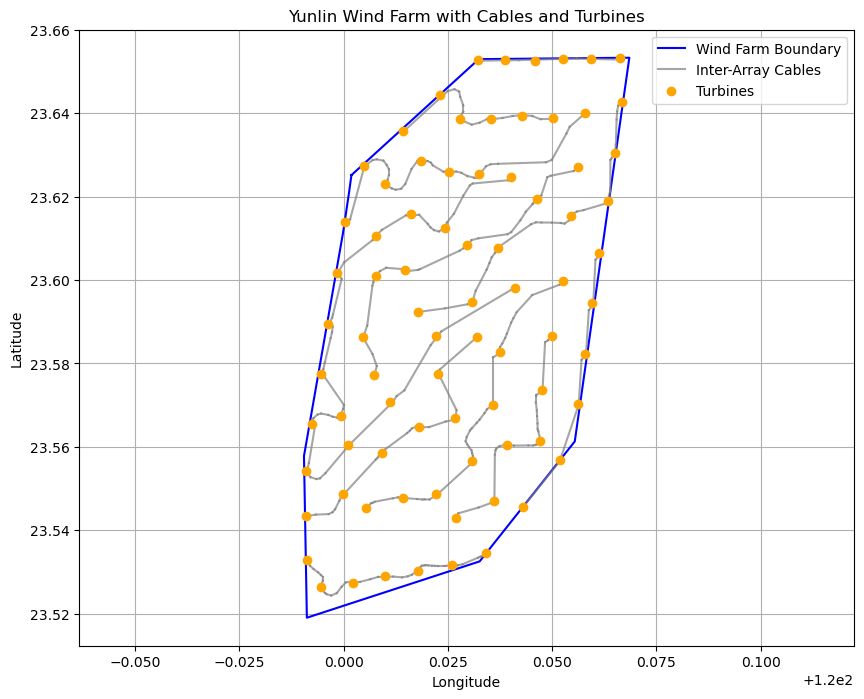

In [14]:
plt.figure(figsize=(10, 8))

# Plot boundary
plt.plot(boundary_array[:, 0], boundary_array[:, 1], 'b-', label='Wind Farm Boundary')

# Plot cables (with single legend entry)
for i, line in enumerate(cables_array):
    x1, y1, x2, y2 = line
    label = 'Inter-Array Cables' if i == 0 else None
    plt.plot([x1, x2], [y1, y2], color='gray', alpha=0.7, label=label)

# Plot turbines
plt.scatter(turbines_array[:, 0], turbines_array[:, 1], color='orange', label='Turbines', zorder=5)

plt.title("Yunlin Wind Farm with Cables and Turbines")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.show()